# Question 1

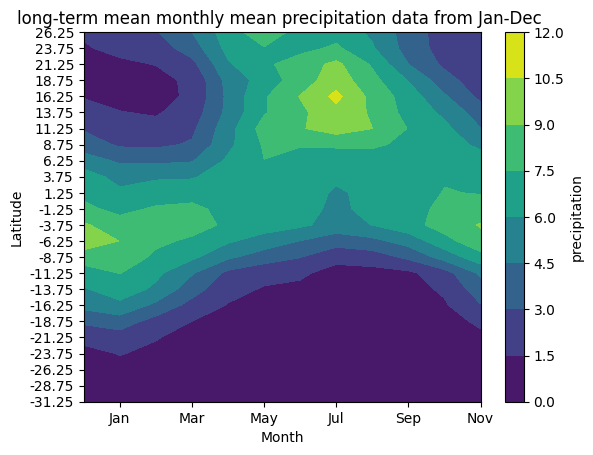

In [1]:
# Make a time-latitude plot of precipitation

import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt

filein = '/data/zhuowang/b/zhuowang/Data/GPCP/precip.mon.ltm.nc'
# the longitude range for meridional mean
lon1 = 90
lon2 = 150
# the latitude range for the time-latitude plot
lat1 = -30
lat2 = 30

# read netCDF data
ncFid = Dataset(filein, 'r')
lon = ncFid.variables['lon'][:]
lat = ncFid.variables['lat'][:]
time = ncFid.variables['time'][:]

# determine the array indices for the latlon domain
i1 = np.argmin(abs(lon-lon1))
i2 = np.argmin(abs(lon-lon2))
j1 = np.argmin(abs(lat-lat1))
j2 = np.argmin(abs(lat-lat2))
dat = ncFid.variables['precip'][:,j1:j2,i1:i2]

# average over longitude
datm = np.transpose(np.nanmean(dat, axis=2))

# plotting
fig, ax = plt.subplots()
CS = ax.contourf(datm)
ax.set_xticks([1, 3, 5, 7, 9, 11], ["Jan", "Mar", "May", "Jul", "Sep", "Nov"])
ax.set_yticks(range(0, 24), lat[j1:j2])
ax.set_title('long-term mean monthly mean precipitation data from Jan-Dec ')
ax.set_xlabel('Month')
ax.set_ylabel('Latitude')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('precipitation')

#save the figure file
fmt='pdf'
plt.savefig('GPCP.mon.ltm.'+fmt,format=fmt,bbox_inches='tight')
plt.show (block=False)


(2) In May. Since the precipitation starts heavier.

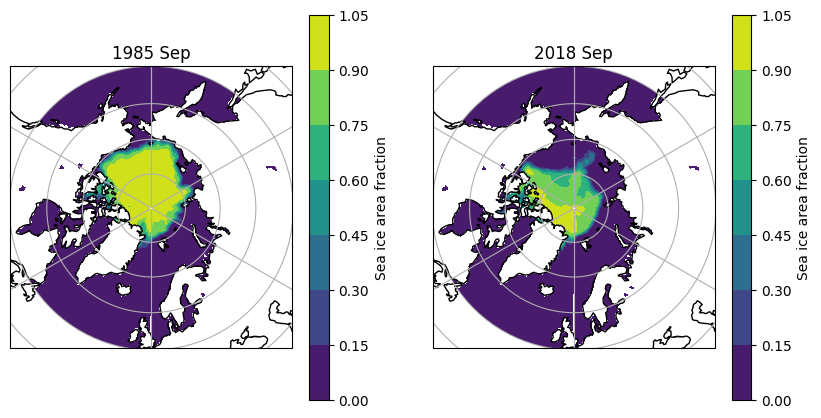

In [2]:
#Plot sea-ice cover from ERAI
#-------------------------------
import numpy as np
import pygrib
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import calendar
import cartopy.crs as ccrs
#specify imon to choose the month for which you will plot the data
imon=9;chmon=calendar.month_abbr[imon]
yrs=[1985,2018]
fnm='/data/zhuowang/b/zhuowang/Data/DS627.1/SFC/ei.moda.an.sfc.regn128sc.'

#the latitude range for the time-latitude plot
lats=50;latn=90
lonw=0;lone=360


fig, axs = plt.subplots(ncols=2,figsize=[10,5], subplot_kw={'projection': ccrs.NorthPolarStereo()})
#We will loop over two years and plot each year in a subplot within the loop
for k in range(2):
    axx=axs[k]
    filein=fnm+str(yrs[k])+str(imon).zfill(2)+'0100'
    grbs=pygrib.open(filein)
#     for grb in grbs:
#          print(grb)
    grb=grbs.select(name='Sea ice area fraction')[0]
    dat,lat,lon= grb.data(lat1=lats,lat2=latn,lon1=lonw,lon2=lone)  
    axx.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    CS = axx.contourf(lon, lat, dat, transform=ccrs.PlateCarree())
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Sea ice area fraction')
    axx.set_xlabel('Longitude')
    axx.set_ylabel('Latitude')
    axx.coastlines()
    axx.gridlines()
  #add a title for the subplot
    axx.title.set_text(str(yrs[k])+' '+chmon)

#save the figure file
fmt='pdf'
plt.savefig('Arctic sea ice Sep.'+fmt,format=fmt,bbox_inches='tight')
plt.show (block=False)

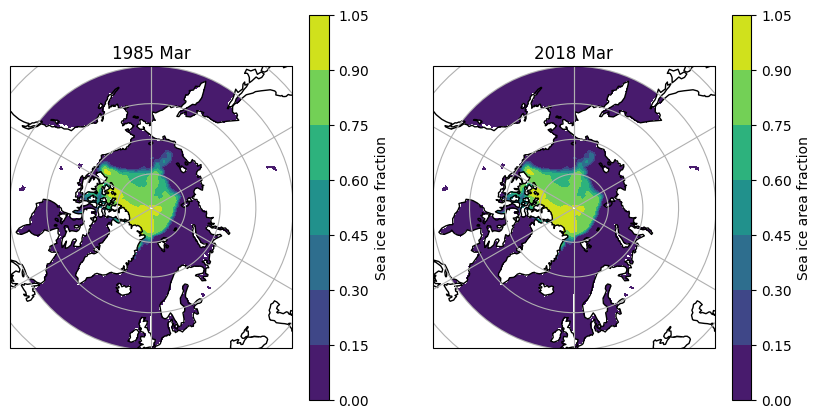

In [3]:
#specify imon to choose the month for which you will plot the data
imon=3;chmon=calendar.month_abbr[imon]
yrs=[1985,2018]
fnm='/data/zhuowang/b/zhuowang/Data/DS627.1/SFC/ei.moda.an.sfc.regn128sc.'

#the latitude range for the time-latitude plot
lats=50;latn=90
lonw=0;lone=360

fig, axs = plt.subplots(ncols=2,figsize=[10,5], subplot_kw={'projection': ccrs.NorthPolarStereo()})
#We will loop over two years and plot each year in a subplot within the loop
for k in range(2):
    axx=axs[k]
    filein=fnm+str(yrs[k])+str(imon).zfill(2)+'0100'
    grbs=pygrib.open(filein)
#     for grb in grbs:
#          print(grb)
    grb=grbs.select(name='Sea ice area fraction')[0] 
    axx.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    CS = axx.contourf(lon, lat, dat, transform=ccrs.PlateCarree())
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Sea ice area fraction')
    axx.set_xlabel('Longitude')
    axx.set_ylabel('Latitude')
    axx.coastlines()
    axx.gridlines()
  #add a title for the subplot
    axx.title.set_text(str(yrs[k])+' '+chmon)
#save the figure file
fmt='pdf'
plt.savefig('Arctic sea ice Sep.'+fmt,format=fmt,bbox_inches='tight')
plt.show (block=False)


There is not an apparent reduction in sea ice concentration in March, but sea ice thickness is likely in decline due to the Arctic warming, which is not reflected by sea ice concentration. Studies on Arctic sea ice loss mainly focus on Sep if sea ice concentration is used. It represents the annual minimum sea ice concentration. Note that sea ice volume depends both on sea ice concentration (or horizontal extent) and sea ice thickness. 

# Question 3

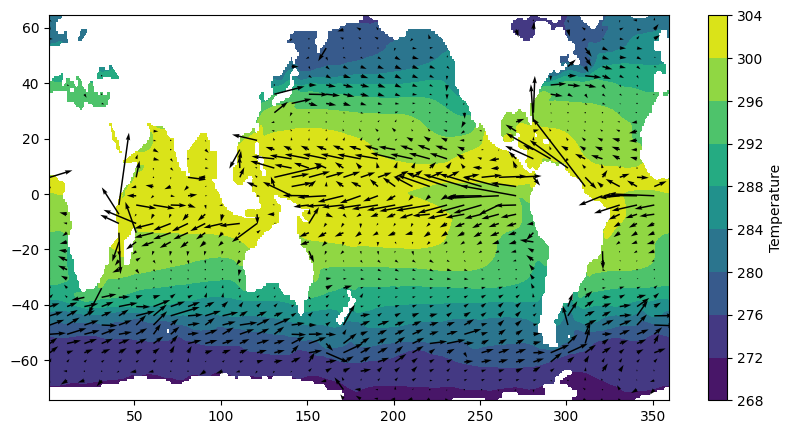

In [4]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt

fileucur='/data/zhuowang/c/zhuowang/Data/GODAS/ucur.mon.ltm.nc'
filevcur='/data/zhuowang/c/zhuowang/Data/GODAS/vcur.mon.ltm.nc'
filetmp='/data/zhuowang/c/zhuowang/Data/GODAS/pottmp.mon.ltm.nc'
#read netCDF data
ncucur=Dataset(fileucur,'r')
ncvcur=Dataset(filevcur,'r')
nctmp=Dataset(filetmp,'r')

# 5 metre deep # the unit of level is wrong
lontmp = nctmp.variables['lon'][:]
lattmp = nctmp.variables['lat'][:]
levtmp = nctmp.variables['lev'][:]
lev5m = 5
l=np.argmin(abs(levtmp-lev5m))
tmp = nctmp.variables['pottmp'][:,l,:,:]
#average over time
dattmp=np.nanmean(tmp,axis=0)

lonucur = ncucur.variables['lon'][:]
latucur = ncucur.variables['lat'][:]
levucur = ncucur.variables['lev'][:]
lev5m = 5
lucur=np.argmin(abs(levucur-lev5m))
ucur = ncucur.variables['ucur'][:,lucur,:,:]
#average over time
datucur=np.nanmean(ucur,axis=0)

lonvcur = ncvcur.variables['lon'][:]
latvcur = ncvcur.variables['lat'][:]
levvcur = ncvcur.variables['lev'][:]
lev5m = 5  
lvcur=np.argmin(abs(levvcur-lev5m))
vcur = ncvcur.variables['vcur'][:,lvcur,:,:]
#average over time
datvcur=np.nanmean(vcur,axis=0)

fig, ax = plt.subplots(figsize=[10,5])
CS = ax.contourf(lontmp, lattmp, dattmp)


cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Temperature')


x, y = np.meshgrid(lonucur, latucur) 
ax.quiver(x[::10, ::10], y[::10, ::10], datucur[::10, ::10], datvcur[::10, ::10])

fmt='pdf'
plt.savefig('current direction.'+fmt,format=fmt,bbox_inches='tight')
plt.show (block=False)

# Question 4

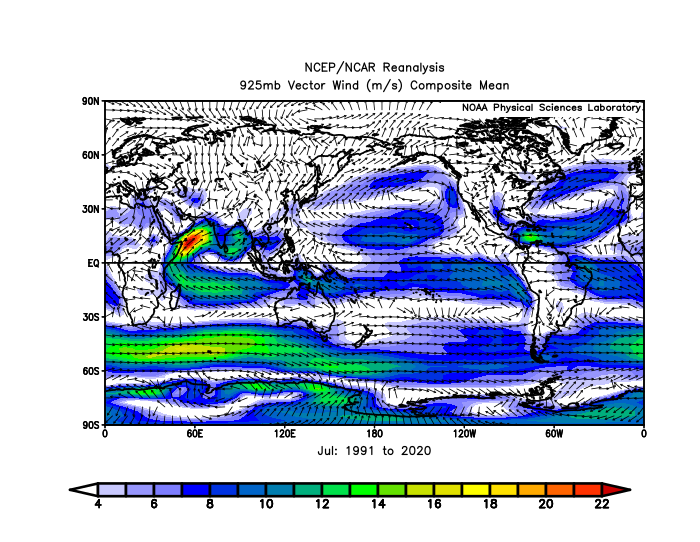

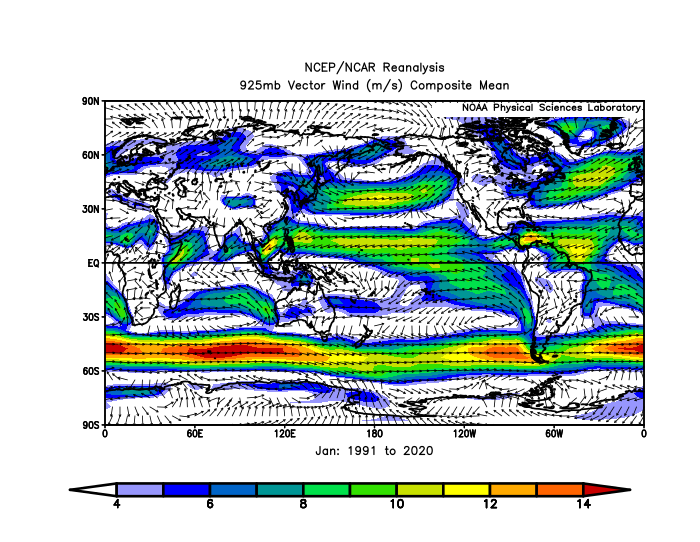

we could see different direction of the monsoon in winter and summer in Indian ocean.  